In [1]:
from __future__ import division

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(12345)
np.set_printoptions(precision=4)
plt.rc('figure',figsize=(10,6))
br='\n'

In [22]:
from __future__ import division
import os, sys
from numpy import *
from math import *

def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-1
    dataArr=[]
    labelArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
       # lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1]))
    return dataArr,labelArr
        

In [23]:
def standRegres(xArr,yArr):
    xMat=mat(xArr);yMat=mat(yArr).T
    xTx=xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws=xTx.I * (xMat.T * yMat)
    return ws

In [24]:
!type data8\ex0.txt

1.000000	0.067732	3.176513
1.000000	0.427810	3.816464
1.000000	0.995731	4.550095
1.000000	0.738336	4.256571
1.000000	0.981083	4.560815
1.000000	0.526171	3.929515
1.000000	0.378887	3.526170
1.000000	0.033859	3.156393
1.000000	0.132791	3.110301
1.000000	0.138306	3.149813
1.000000	0.247809	3.476346
1.000000	0.648270	4.119688
1.000000	0.731209	4.282233
1.000000	0.236833	3.486582
1.000000	0.969788	4.655492
1.000000	0.607492	3.965162
1.000000	0.358622	3.514900
1.000000	0.147846	3.125947
1.000000	0.637820	4.094115
1.000000	0.230372	3.476039
1.000000	0.070237	3.210610
1.000000	0.067154	3.190612
1.000000	0.925577	4.631504
1.000000	0.717733	4.295890
1.000000	0.015371	3.085028
1.000000	0.335070	3.448080
1.000000	0.040486	3.167440
1.000000	0.212575	3.364266
1.000000	0.617218	3.993482
1.000000	0.541196	3.891471
1.000000	0.045353	3.143259
1.000000	0.126762	3.114204
1.000000	0.556486	3.851484
1.000000	0.901144	4.621899
1.000000	0.958476	4.580768
1.000000	0.274561	3.620992
1.000000	0.394396	3.580501
1

In [25]:
xArr,yArr=loadDataSet("data8/ex0.txt")

In [26]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [27]:
yArr[0:2]

[3.176513, 3.816464]

In [28]:
ws=standRegres(xArr,yArr)

In [29]:
ws

matrix([[3.0077],
        [1.6953]])

In [30]:
xMat=mat(xArr)
yMat=mat(yArr)
yHat=xMat * ws

In [31]:
print(yArr[0:2],type(yArr))
print(yHat[0:2],type(yHat))

[3.176513, 3.816464] <class 'list'>
[[3.1226]
 [3.733 ]] <class 'numpy.matrixlib.defmatrix.matrix'>


In [32]:
yHat[0:2].tolist()

[[3.1225708358971342], [3.733019222244863]]

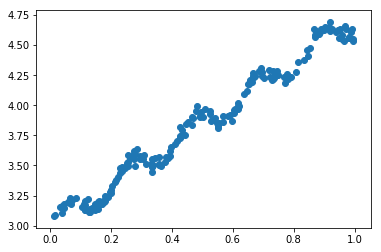

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

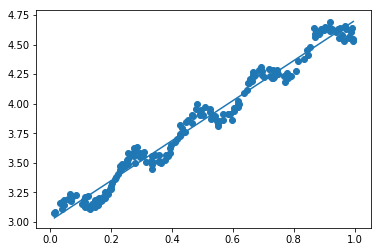

In [36]:
xCopy = xMat.copy()
xCopy.sort(0)
yHat=xCopy * ws

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
ax.plot(xCopy[:,1],yHat)

In [37]:
yHat=xMat * ws

In [38]:
corrcoef(yMat,yHat.T)

array([[1.    , 0.9865],
       [0.9865, 1.    ]])

In [62]:
def lwlr(testPoint,xArr, yArr,k=1.0):
    xMat=mat(xArr);yMat=mat(yArr).T
    m=shape(xMat)[0]
    weights=mat(eye((m)))
    for j  in range(m):
        diffMat=testPoint -xMat[j,:]
        weights[j,j]=exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx=xMat.T*(weights*xMat)
    if linalg.det(xTx)==0.0:
        print("This matriex is singular,cannot do inverse")
        return 
    ws=xTx.I *(xMat.T *(weights*yMat))
    return testPoint *ws
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m=shape(testArr)[0]
    yHat=zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat
def lwlrTestPlot(xArr,yArr,k=1.0):
    yHat=zeros(shape(yArr))
    xCopy=mat(xArr)
    xCopy.sort(0)
    for i in range(shape(xArr)[0]):
        yHat[i]=lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [42]:
xArr,yArr=loadDataSet("data8/ex0.txt")

In [45]:
print(yArr[0])
print(lwlr(xArr[0],xArr,yArr,1.0))
print(lwlr(xArr[0],xArr,yArr,0.05))
print(lwlr(xArr[0],xArr,yArr,0.001))

3.176513
[[3.1226]]
[[3.1226]]
[[3.1226]]


In [46]:
yHat=lwlrTest(xArr,xArr,yArr,1.0)

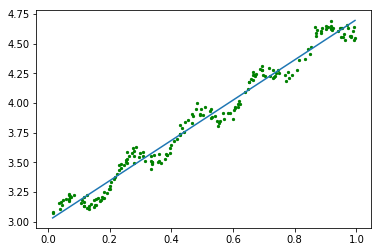

In [58]:
xMat=mat(xArr)
srtInd =xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=5,c='green')
ax.plot(xSort[:,1],yHat[srtInd])

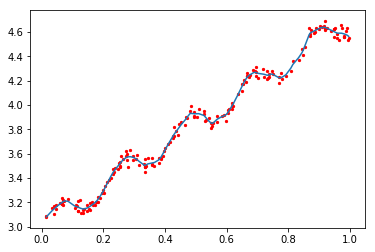

In [63]:
yHat=lwlrTest(xArr,xArr,yArr,0.01)
xMat=mat(xArr)
srtInd=xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=5,c='red')
ax.plot(xSort[:,1],yHat[srtInd])

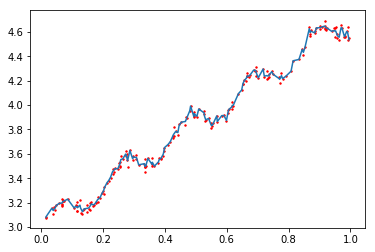

In [64]:
yHat=lwlrTest(xArr,xArr,yArr,0.003)
xMat=mat(xArr)
srtInd=xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0,:]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=2,c='red')
ax.plot(xSort[:,1],yHat[srtInd])

In [65]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()


In [66]:
abX,abY=loadDataSet('data8/abalone.txt')

In [67]:
yHat01=lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1=lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10=lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [68]:
err01=rssError(abY[0:99],yHat01.T)
err1=rssError(abY[0:99],yHat1.T)
err10=rssError(abY[0:99],yHat10.T)
print(err01,err1,err10)

56.78420911837208 429.89056187030394 549.1181708826065


In [71]:
yHat01=lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1=lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10=lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

err01=rssError(abY[100:199],yHat01.T)
err1=rssError(abY[100:199],yHat1.T)
err10=rssError(abY[100:199],yHat10.T)
print(err01,err1,err10)

25119.459111157415 573.5261441895706 517.5711905381745


In [73]:
ws=standRegres(abX[0:99],abY[0:99])
yHat=mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.6363153249081

In [ ]:
#岭回归训练

In [74]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx=xMat.T*xMat
    denom=xTx+eye(shape(xMat)[1])*lam
    if linalg.det(denom)==0.0:
        print("This matrix is singular ,cannot do inverse")
        return 
    ws=denom.I*(xMat.T*yMat)
    return ws 
def ridgeTest(xArr,yArr):
    xMat=mat(xArr);yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
    
    xMeans=mean(xMat,0)
    xVar=var(xMat,0)
    xMat=(xMat-xMeans)/xVar
    numTestPts=30
    wMat=zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws=ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [75]:
abX,abY=loadDataSet('data8/abalone.txt')

In [76]:
abX[0:2]

[[1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15],
 [1.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07]]

In [77]:
abY[0:2]

[15.0, 7.0]

In [79]:
ridgeWeights=ridgeTest(abX,abY)
ridgeWeights[0:2]

array([[ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
         0.1662],
       [ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
         0.1662]])

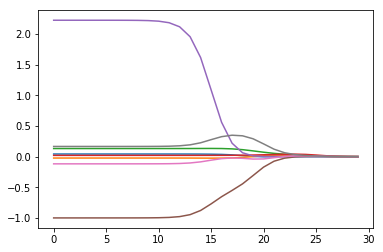

In [80]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig =plt.figure()
ax=fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()


In [81]:
RGws01=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.1)
RGws02=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.2)
RGws05=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.5)

yHat01=mat(abX[100:199])*RGws01
yHat02=mat(abX[100:199])*RGws02
yHat05=mat(abX[100:199])*RGws05

err01=rssError(abY[100:199],yHat01.T.A)
err02=rssError(abY[100:199],yHat02.T.A)
err05=rssError(abY[100:199],yHat05.T.A)
print(err01,err02,err05)

423.1738026377151 429.6299801738408 460.9777965706153


In [82]:
def regularize(xMat):
    inMat=xMat.copy()
    inMeans=mean(inMat,0)
    inVar=var(inMat,0)
    inMat=(inMat-inMeans)/inVar
    return inMat

In [93]:
def stageWise(xArr,yArr,eps=0.01,numlt=100):
    xMat=mat(xArr);yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
    xMat=regularize(xMat)
    m,n=shape(xMat)
    returnMat=zeros((numlt,n))
    ws=zeros((n,1));wsTest=ws.copy();wsMax=ws.copy()
    for i in range(numlt):
        lowestError=inf;
        for j in range(n):
            for sign in [-1,1]:
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xMat*wsTest
                rssE=rssError(yMat.A,yTest.A)
                if rssE<lowestError:
                    lowestError=rssE
                    wsMax=wsTest
        ws=wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [94]:
abX,abY=loadDataSet('data8/abalone.txt')

In [95]:
returnMat=stageWise(abX,abY,0.01,200)

In [96]:
returnMat

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [97]:
xMat=mat(abX)
yMat=mat(abY).T
xMat=regularize(xMat)
yMat=yMat-mean(yMat,0)
weights=standRegres(xMat,yMat.T)
weights.T

matrix([[ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
          0.1662]])

In [98]:
stageWeights=stageWise(abX,abY,0.005,1000)


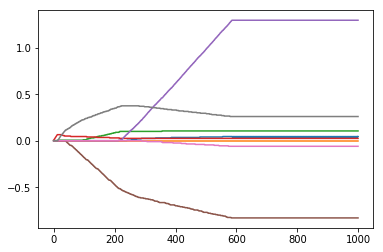

In [99]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(stageWeights)
plt.show()

In [103]:
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit([[0,0],[1,1],[2,2]],[0,1,2])
print(clf.coef_)

[0.5 0.5]


In [104]:
from sklearn import linear_model
clf  =linear_model.LinearRegression()

abX,abY=loadDataSet('data8/abalone.txt')
trainX=abX[0:99];trainY=abY[0:99]
testX=abX[100:199];testY=abY[100:199]

clf.fit(trainX,trainY)
yHat=clf.predict(testX)

In [105]:
print(yHat[:2])
print(testY[:2])
clf.score(testX,testY)

[ 7.484  10.8339]
[7.0, 15.0]


0.530016062244513

In [106]:
rssError(array(yHat),array(testY))

608.5010219557859

In [107]:
sqrt(rssError(array(yHat),array(testY)))/100

0.24667813481453638

In [108]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
clf =linear_model.Ridge(alpha=.5)
clf.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print(clf.coef_)
print(clf.intercept_)

[0.3455 0.3455]
0.1363636363636364


In [109]:
from sklearn import linear_model
clf  =linear_model.Lasso(alpha=0.1)
clf.fit([[0,0],[1,1]],[0,1])
clf.predict([[1,1]])

array([0.8])

In [110]:
from sklearn import linear_model
clf=linear_model.ElasticNet(alpha=1.0)
clf.fit([[0,0],[1,1]],[0,1])
clf.predict([[1,1]])

array([0.5])

In [113]:
import numpy as np
from sklearn import linear_model
n_samples,n_features=10,5
np.random.seed(0)
y=np.random.randn(n_samples)
X=np.random.randn(n_samples,n_features)
clf=linear_model.SGDRegressor(tol=1e-3)
clf.fit(X,y)
clf.predict([[1,1,1,1,1]])

array([0.5815])

In [114]:
from __future__ import division
import os,sys
from numpy import *
from math import *

def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-2
    dataArr=[]
    lonArr=[]
    latArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2]))
        latArr.append(float(curLine[-1]))
    return dataArr,lonArr,latArr

In [115]:
def standRegres(xArr,yArr):
    xMat=mat(xArr);yMat=mat(yArr).T
    xTx=xMat.T*xMat
    if linalg.det(xTx)==0.0:
        print("This matrix is singular,cannot do inverse")
        return 
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [116]:
dataArr,lonArr,latArr=loadDataSet('data8/typhoon.dat')

In [117]:
def absError(yArr,yHatArr):
    return abs(yArr-yHatArr).sum()/len(yArr)

In [118]:
wsLon=standRegres(dataArr,lonArr)
wsLon

matrix([[-1.5467e+00],
        [-2.2752e+01],
        [-2.1843e+00],
        [ 1.4225e+00],
        [ 2.7127e+01],
        [-1.9341e-01],
        [ 1.6794e+01],
        [-2.5340e+00],
        [-5.7848e-01],
        [ 2.4632e+03],
        [-2.6875e+02],
        [ 2.0940e-03],
        [-2.4631e+03],
        [ 2.2415e+01],
        [ 1.1001e-01],
        [-1.9900e-01],
        [-1.9233e-02]])

In [119]:
wsLat=standRegres(dataArr,latArr)
wsLat

matrix([[ 3.9490e+00],
        [-2.7748e+01],
        [ 6.5507e+00],
        [-1.2969e+01],
        [ 2.8823e+01],
        [ 6.4507e+00],
        [-1.2002e+00],
        [-9.1449e-01],
        [-1.8375e-01],
        [ 2.5566e+03],
        [-2.7858e+02],
        [-3.9001e-04],
        [-2.5543e+03],
        [ 2.9041e+01],
        [-1.5890e+00],
        [ 1.0309e-01],
        [ 1.6060e-02]])

In [120]:
xMat=mat(dataArr)

In [121]:
lonHatArr=xMat * wsLon

In [122]:
latHatArr=xMat*wsLat

In [124]:
absErrorLon=absError(lonArr,lonHatArr.T)
absErrorLon

30.47250456422529

In [125]:
absErrorLat=absError(latArr,latHatArr.T)
absErrorLat

1.8224046653726158

In [126]:
corrcoef(lonHatArr.T,lonArr)

array([[1.    , 0.9452],
       [0.9452, 1.    ]])

In [127]:
corrcoef(latHatArr.T,latArr)

array([[1.    , 0.9205],
       [0.9205, 1.    ]])

In [128]:
110*sqrt(absErrorLon**2+absErrorLat**2)

3357.9645304099545

In [129]:
import numpy as np
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data8/typhoon.dat')
trainX=dataArr[0:299];lonTrainY=lonArr[0:299];latTrainY=latArr[0:299]
testX=dataArr[300:];lonTestY=lonArr[300:];latTestY=latArr[300:]

from sklearn import linear_model
clf=linear_model.LinearRegression()

clf.fit(trainX,lonTrainY)
lonyHat =clf.predict(testX)

clf.fit(trainX,latTrainY)
latyHat=clf.predict(testX)

In [130]:
absErrorLon=absError(lonTestY,lonyHat)
absErrorLat=absError(latTestY,latyHat)

110*sqrt(absErrorLon**2+absErrorLat**2)

158.5368046253329